In [1]:
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline
from scipy.integrate import solve_ivp
from scipy.sparse import *
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from jupyterthemes import jtplot

from differential_equation import Solver
# MCEq Imports
from MCEq.particlemanager import ParticleManager
import MCEq.core    
from MCEq.core import MCEqRun
from MCEq.data import Decays
import mceq_config as config
#import primary model choices
import crflux.models as pm

config.A_target=1.27
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
config.muon_helicity_dependence=True

config.debug_level = 0

# Launcing mceq
mceq_run = MCEqRun(
    #provide the string of the interaction model
    interaction_model='SIBYLL23CPP',
    #primary cosmic ray flux model
    primary_model = (pm.HillasGaisser2012, "H3a"),
    
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0
    
)







In [2]:


jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)

In [3]:
list_particles=[mceq_run.pman[2212],     #p+           (0)
                mceq_run.pman[-2212],     #pbar-        (1)
                mceq_run.pman[2112],     #n            (2)
                mceq_run.pman[-2112],    #nbar         (3)
                mceq_run.pman[211],      #pi+          (4)
                mceq_run.pman[-211],     #pi-          (5)
                mceq_run.pman[310],      #K_S0         (6) 
                mceq_run.pman[130],      #K_L0         (7)
                mceq_run.pman[321],      #K+           (8)
                mceq_run.pman[-321],     #K-           (9)
                mceq_run.pman[111],      #pi0          (10)
                mceq_run.pman[-3122],    #Lambdbar0    (11)
                mceq_run.pman[3122],     #Lambda0      (12)
                mceq_run.pman[13],   #mu-          (13)
                mceq_run.pman[-13],  #mu+          (14)
                mceq_run.pman[-11],      #e+           (15)   
                mceq_run.pman[11],       #e-           (16)
                mceq_run.pman[12],       #numu         (23)
                mceq_run.pman[-12],      #numubar      (24)
                mceq_run.pman[14],       #nue          (21)
                mceq_run.pman[-14],      #nuebar       (22)
                mceq_run.pman[22]#gamma        (25)
               ]


"""""
For indices of the particles in phi 
"""""
j=0
ind={}
for i in list_particles:
    ind[i.name,'up']=0+j
    ind[i.name,'low']=121+j
    j=j+121



#list of pdg ids 
list_particles_pdg_id=[]
for i in range(0,len(list_particles)):
    list_particles_pdg_id.append(list_particles[i].pdg_id[0])
    


I_models=['EPOSLHC',  'QGSJETII04', 'SIBYLL23C03']





In [4]:


"""""
The primary fluxes
"""""
phi=np.zeros(len(list_particles)*121)
phi0_p = (
    mceq_run._phi0[mceq_run.pman[2212].lidx:mceq_run.pman[2212].uidx]
)
phi0_n=(
    mceq_run._phi0[mceq_run.pman[2112].lidx:mceq_run.pman[2112].uidx]
)
phi[242:363]=phi0_n
phi[0:121]=phi0_p




In [5]:
import codecs
file = codecs.open('/home/kruteesh/Desktop/Solar_neutrinos/rho.txt', 'r', 'UTF-8')
print(file)
tline = file.readlines()
b=tline[5:]
r_ratio=[]
rho_data=[]
c=[]
for i in b:
    r_ratio.append(float(i.split(' ')[1]))

    rho_data.append(float(i.split(' ')[3]))

"The Sun and the X for the path from sun "
R_sun=6.957e10
h_list=[0.1,0.8   ]
new_h=np.array([h*R_sun for h in h_list])
print(new_h)
X=Solver(list_particles,R_sun,new_h,phi).X_rho(r_ratio,rho_data)
"""""
x2rho={}
final_X={}#the dictionaries
for h in new_h:
    rhh=rho(R_sun,h,r_ratio,rho_data)
    x2rho[h]=rhh.X2rho()
    final_X[h]=rhh.final_X()
  
    
# In[34]:
"""""

[6.9570e+09 5.5656e+10]
6957000000.0
55656000000.0


'""\nx2rho={}\nfinal_X={}#the dictionaries\nfor h in new_h:\n    rhh=rho(R_sun,h,r_ratio,rho_data)\n    x2rho[h]=rhh.X2rho()\n    final_X[h]=rhh.final_X()\n  \n    \n# In[34]:\n'

In [11]:
dphidE_i_ms=pickle.load(open("04,02,21_i_ms.pkl","rb"))
dphidE2_i_ms=pickle.load(open("03,02,21_i_ms.pkl","rb"))
dphidE=pickle.load(open("20,01,21.pkl","rb"))
#dphidE3=pickle.load(open("13,01,21.pkl","rb"))
d=pickle.load(open("04,02,21_i_ms.pkl","rb"))

In [15]:
d[I_models[0]].keys()

dict_keys([55656000000.0])

In [14]:
dphidE_i_ms=dphidE_i_ms.update(d)
#dphidE.update(dphidE4)
#dphidE.update(dphidE3)"""""

AttributeError: 'NoneType' object has no attribute 'update'

In [13]:
dphidE_i_ms[I_models[0]].keys()

TypeError: 'NoneType' object is not subscriptable

In [22]:
#np.array([695700000.0, 6957000000.0, 27828000000.0, 55656000000.0, 68874300000.0, 69500430000.0, 69563043000.0, 69569304300.0, 69569999304.3])/R_sun

array([0.01      , 0.1       , 0.4       , 0.8       , 0.99      ,
       0.999     , 0.9999    , 0.99999   , 0.99999999])

In [9]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


In [10]:

#X2r=Solver(list_particles,R_sun,new_h[:1],phi).X2R(np.array(r_ratio),np.array(rho_data))

In [10]:
import rho_X

In [11]:
x2r={}
x2l={}
for h in new_h:
    
    x2r[h]=rho_X.rho(R_sun,h,r_ratio,rho_data).X2R()
    x2l[h]=rho_X.rho(R_sun,h,r_ratio,rho_data).X2l()
    

In [12]:
x2r.keys()

array([-1.0007126, -1.0007047, -1.0006968, ...,  1.0006968,  1.0007047,
        1.0007126])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [14]:
dphidE_i_ms[I_models[0]][0.1*R_sun].shape

(4201, 2662)

KeyError: 0.1

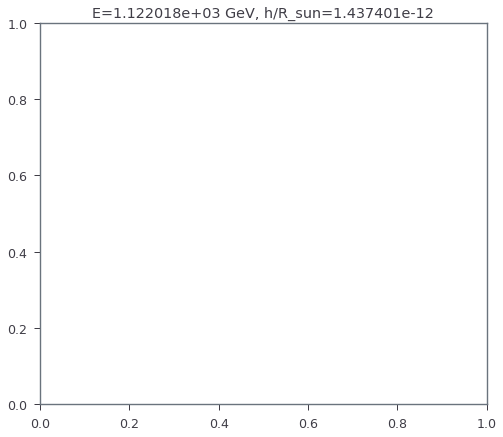

In [24]:
h=0.1
for im in I_models:
    plt.title('E='+'{:e}'.format(mceq_run.e_grid[41])+' GeV, h/R_sun='+'{:e}'.format(h/R_sun))
    for p in [mceq_run.pman[12]]:
        bb_1=np.array([])
        for i,j in enumerate(dphidE_i_ms[h]):             
            bb_1=np.append(
                    bb_1,
                    (dphidE_i_ms[im][h].T[ind[p.name,'up']:ind[p.name,'low']][51].T[i]
                            -dphidE_i_ms[im][h].T[ind[p.name,'up']:ind[p.name,'low']][51].T[i-1]
                              ))
        
        plt.plot(abs(t_tmp[h,'x2r'])[1:]/R_sun,(bb_1)*mceq_run.e_grid[51]**3 ,'o',label=p.name)
    
    #plt.xlim((0.8,1.00082))
    plt.xlabel('r/R_sun')
    plt.ylabel(r'$E^3\frac{d\Phi}{dXdE}\times 10^{10}$')
    plt.legend()

[-2.721450075406752e-18, 7.312757733581928e-19, -6.761637530158224e-20, 3.946677949592762e-18, 1.17018557467684e-16, 2.222377583264442e-18, 1.0261978512104711e-20, 5.580056994002612e-19, 6.635316064062949e-18, -1.5338141957134994e-17, -2.7054993922833107e-21, -1.6270926056638562e-19, -3.4472532131417816e-17, -4.752246421419007e-18, 3.558885015455505e-18, 1.5309046112047251e-18, 6.933260275759949e-14, -7.977697363200728e-20, -3.6536981590462194e-18, 5.74369190654458e-20, -3.023620380224899e-19, 8.835216633249488e-20, 1.136478551193607e-19, -2.1154874752042717e-18, -4.138671125294748e-19, 6.415216870412666e-20, 8.317597850126653e-20, 5.637374713135375e-20, 4.603127344227869e-21, 1.1282902461660733e-21, 4.329764740650576e-23]
[-4.411762650697228e-18, -4.882271990528831e-19, 7.056913592909373e-21, 4.868262458560801e-18, 2.189340012984788e-16, 6.710969107421331e-18, 7.819041429548867e-21, 7.687960871906976e-19, 1.1189362115389008e-17, -1.0928219255743385e-17, -2.2953070628169033e-20, -5.211

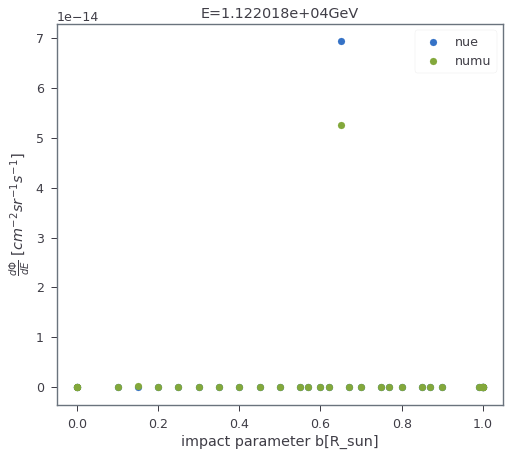

In [16]:
 plt.figure()
for p in [mceq_run.pman[12],mceq_run.pman[14]]:
   
    bb=[]
    plt.title('E='+'{:e}'.format(mceq_run.e_grid[51])+'GeV')
    for i,h in enumerate(h_list):



        bb_1=(dphidE[h_list[i]*R_sun]['y'].T[-1][ind[p.name,'up']:ind[p.name,'low']][51])
        
        bb.append(bb_1)
    print(bb)
    plt.scatter(h_list,bb,label=p.name) 
    plt.ylabel(r'$\frac{d\Phi}{dE}$ $[cm^{-2} sr^{-1} s^{-1}]$')
    plt.xlabel('impact parameter b[R_sun]')
    #plt.ylim((e-13,2e-14))
    plt.legend()
   



[array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.43166509e-08, -1.43229254e-08, -1.43325295e-08, ...,
         5.16003618e-74,  2.05565662e-78,  7.18512581e-86],
       [-1.03618334e-07, -1.03647408e-07, -1.03691902e-07, ...,
         1.03231709e-73,  4.11475599e-78,  2.15551245e-85],
       ...,
       [ 7.89627807e-03,  7.84693206e-03,  7.77236731e-03, ...,
         2.62028226e-43,  2.22917955e-44,  2.89185014e-46],
       [ 7.84008744e-03,  7.77757768e-03,  7.68706271e-03, ...,
         5.16123994e-43,  4.39087558e-44,  5.69615666e-46],
       [ 7.83434658e-03,  7.77049872e-03,  7.67836616e-03, ...,
        -1.17997930e-26, -5.25776791e-28, -6.33297597e-29]]), array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.43166509e-08, -1.43229254e-08, -1.43325295e-08, ...,
         5.16003618e-74,  2.05565662e-78,  7.18512581

/home/kruteesh/.local/lib/python3.8/site-packages/numpy/ma/core.py:2831: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: setting an array element with a sequence.

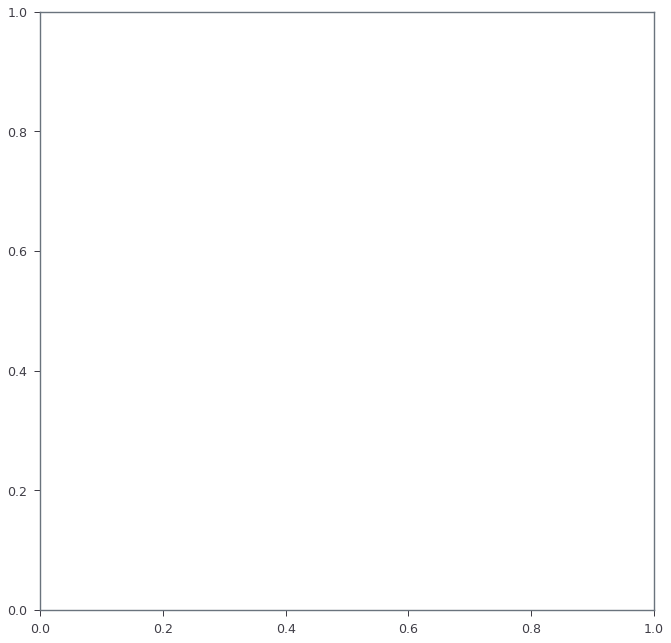

<ipython-input-18-bc52f5c311c5>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(11,11))


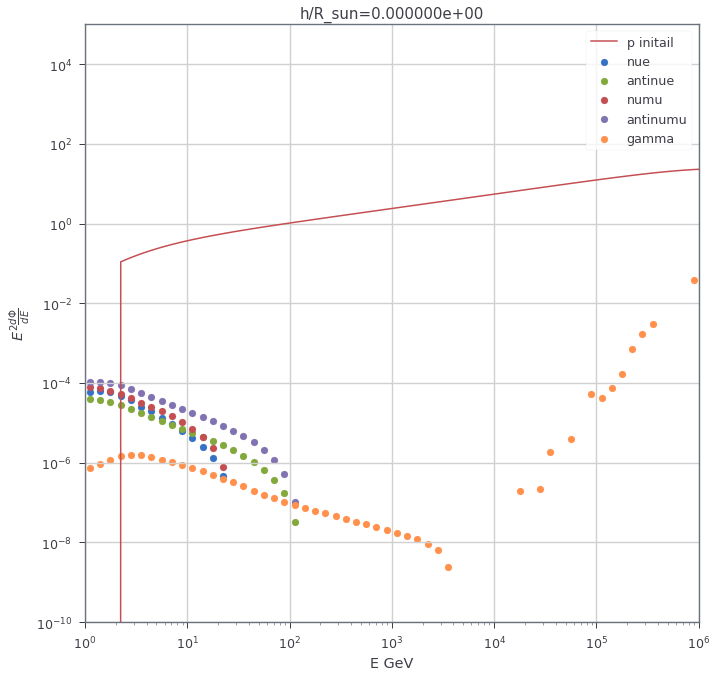

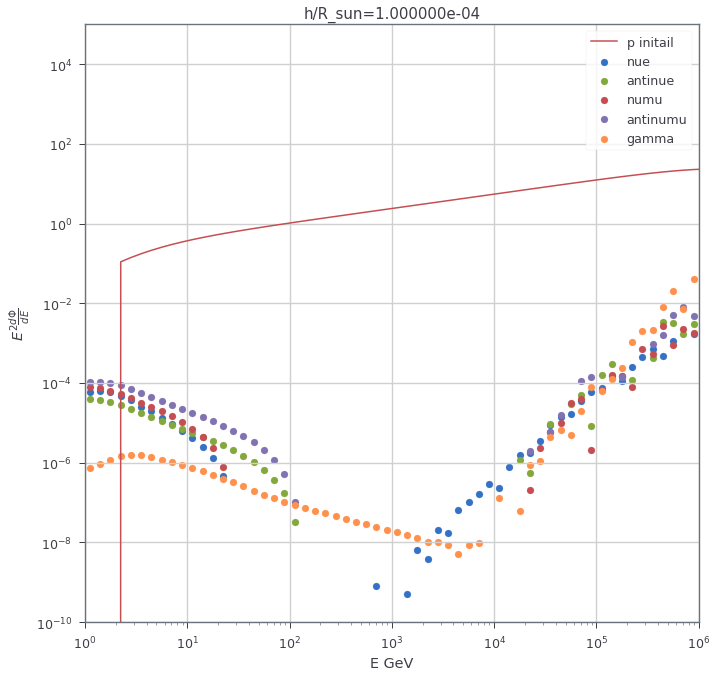

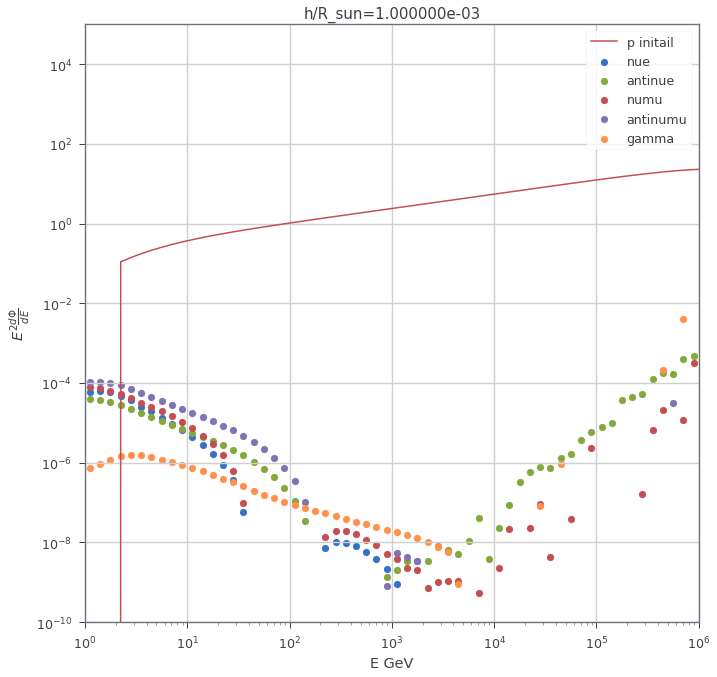

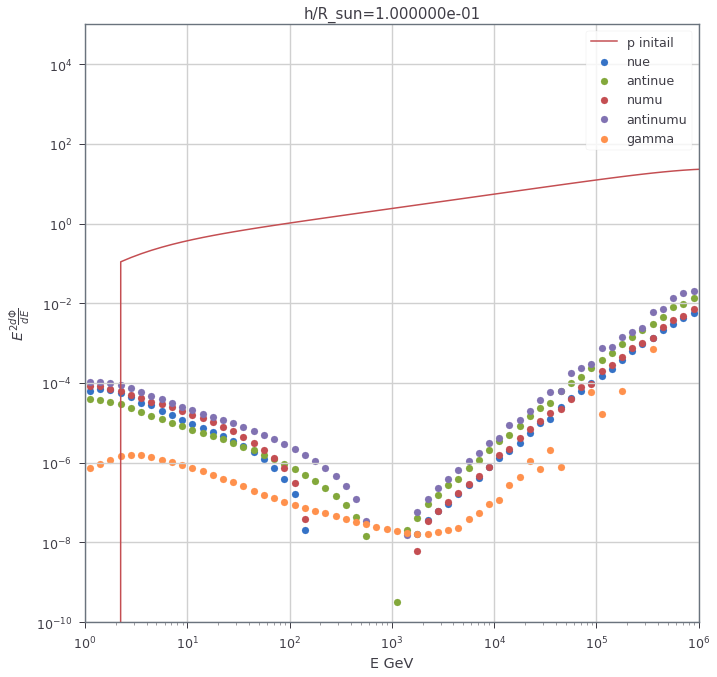

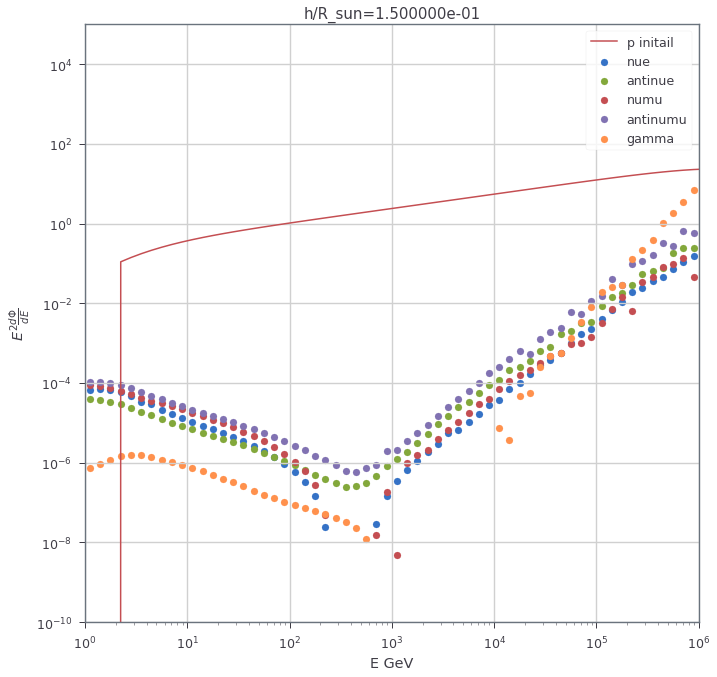

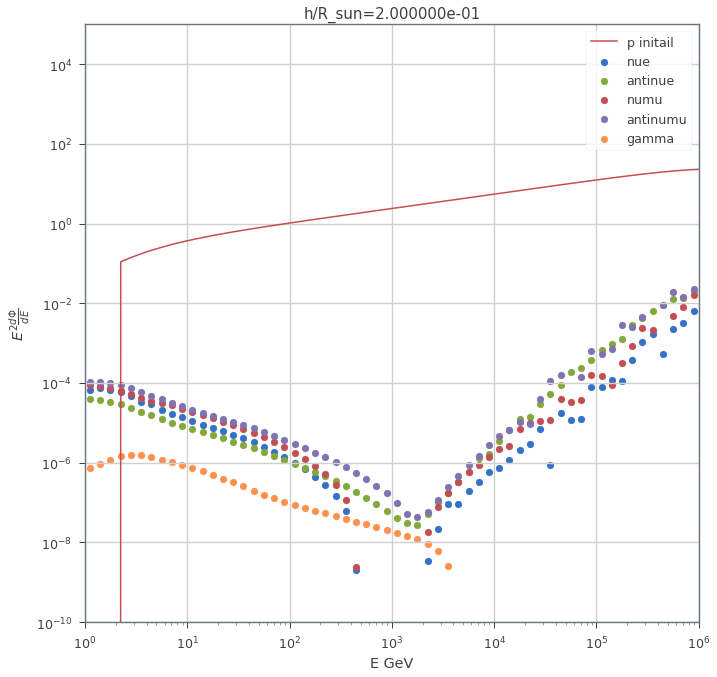

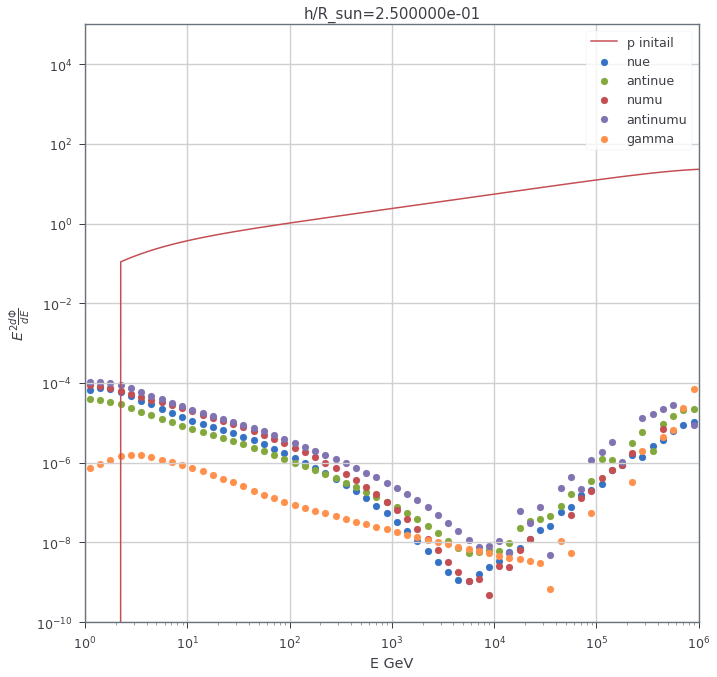

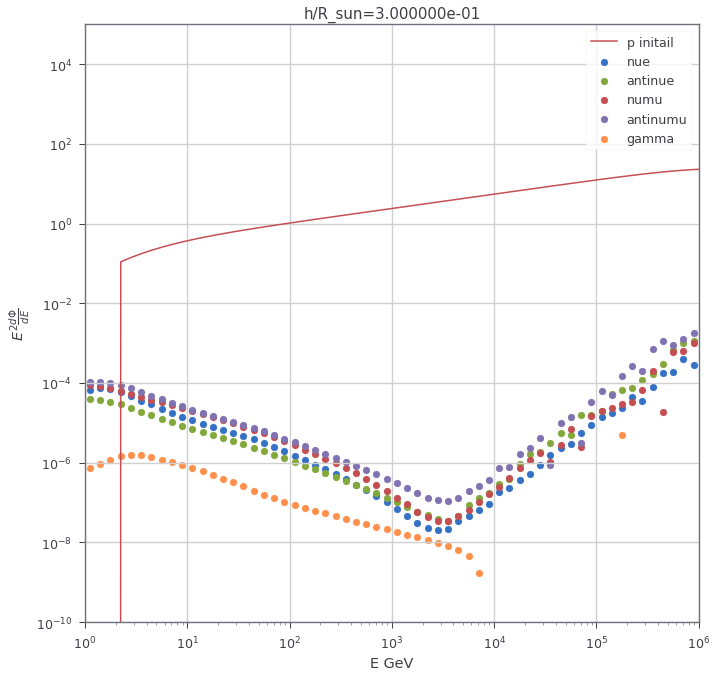

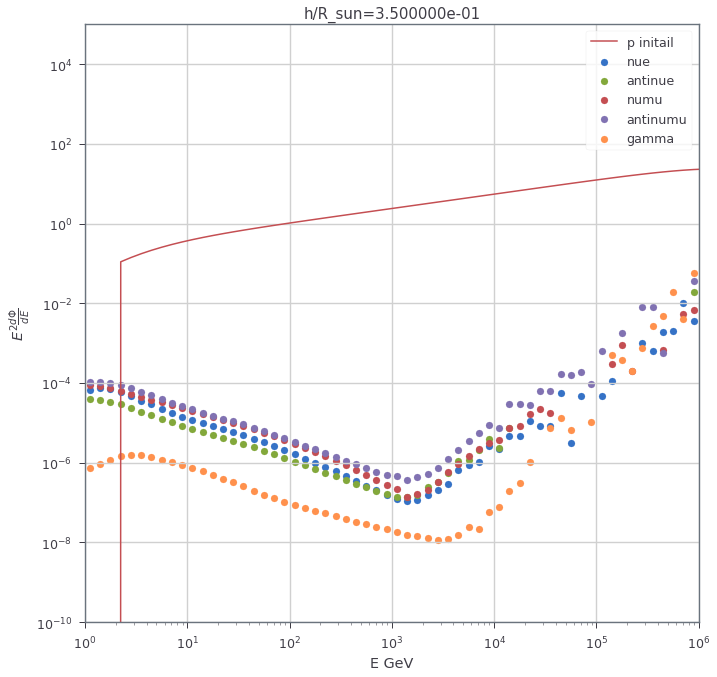

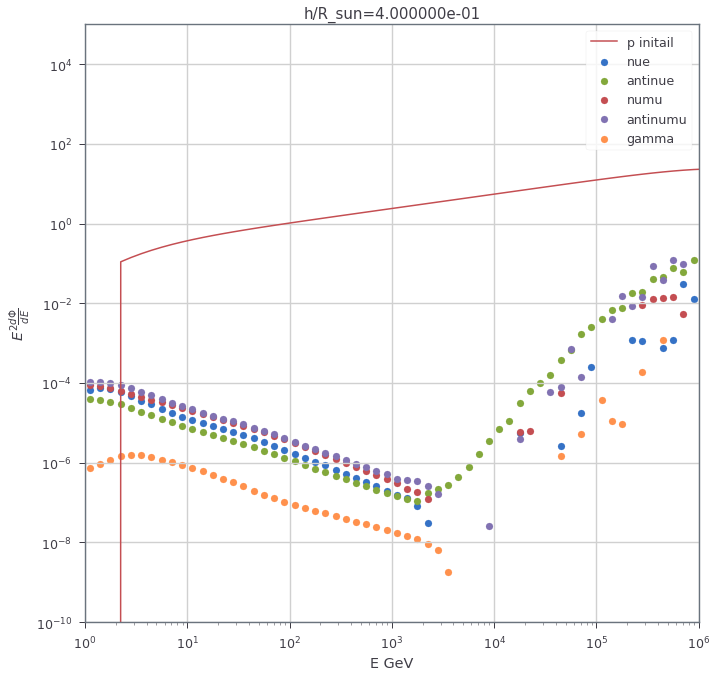

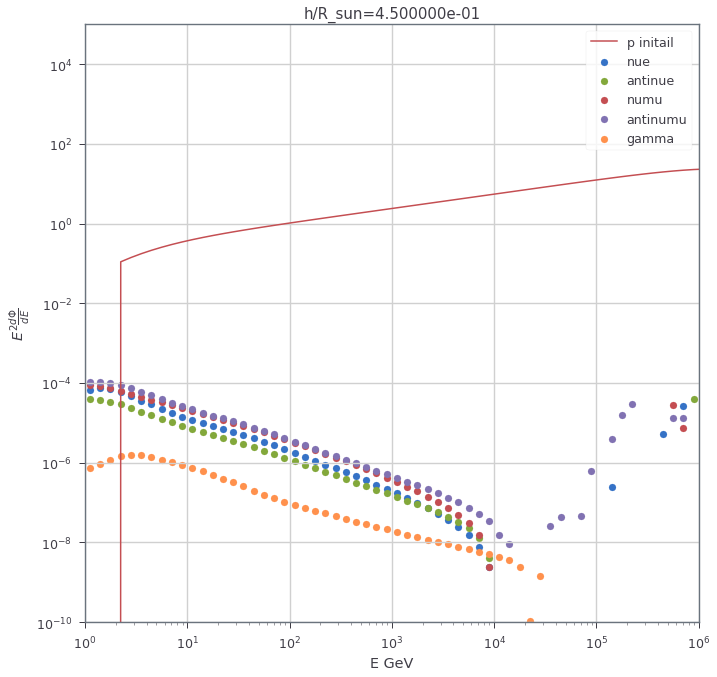

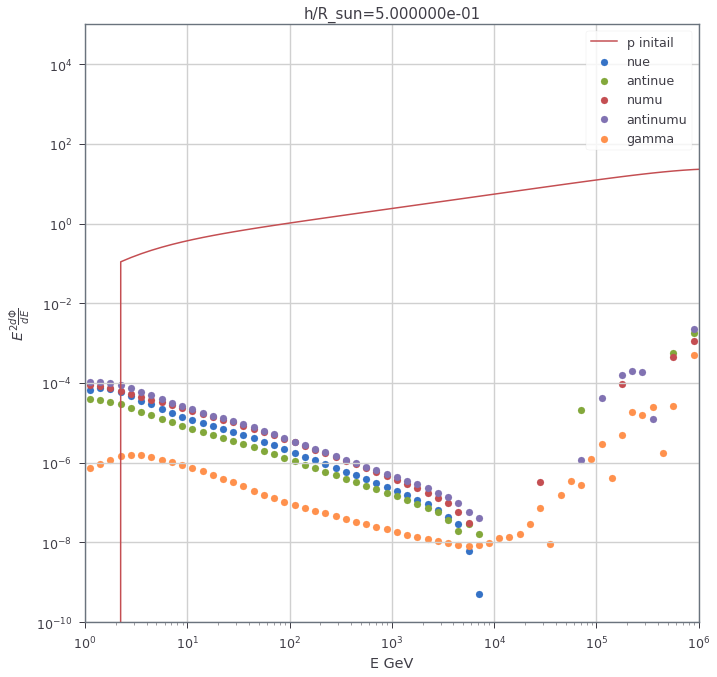

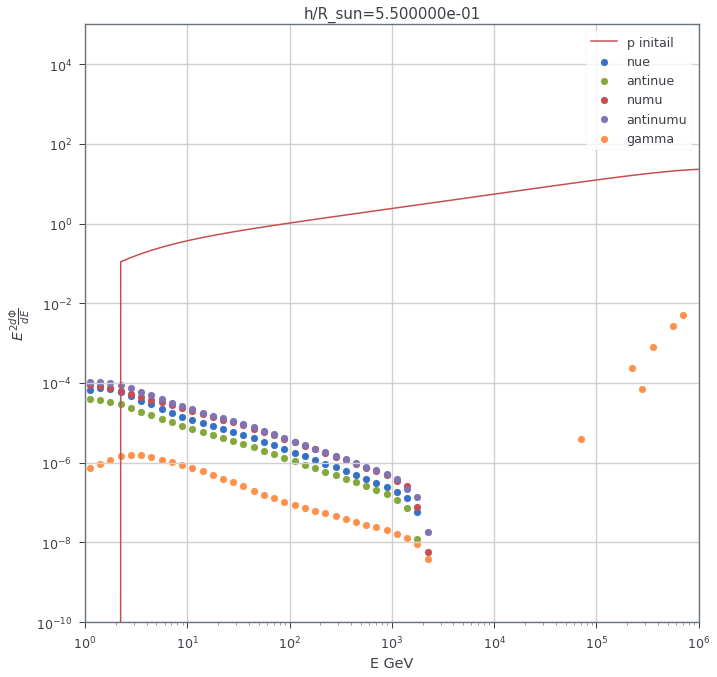

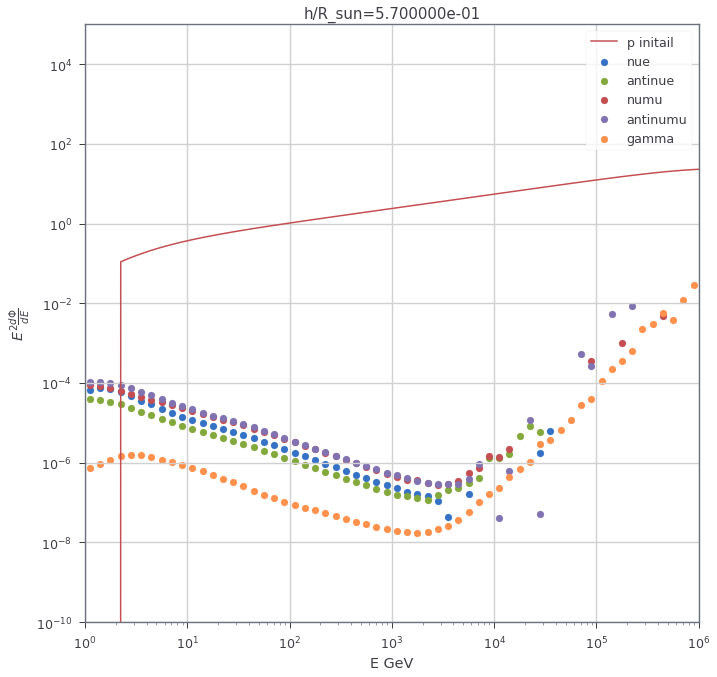

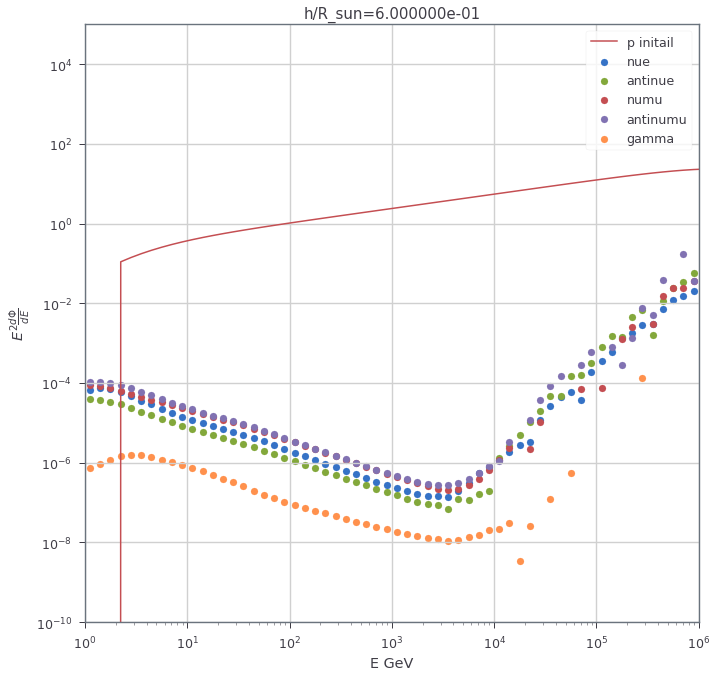

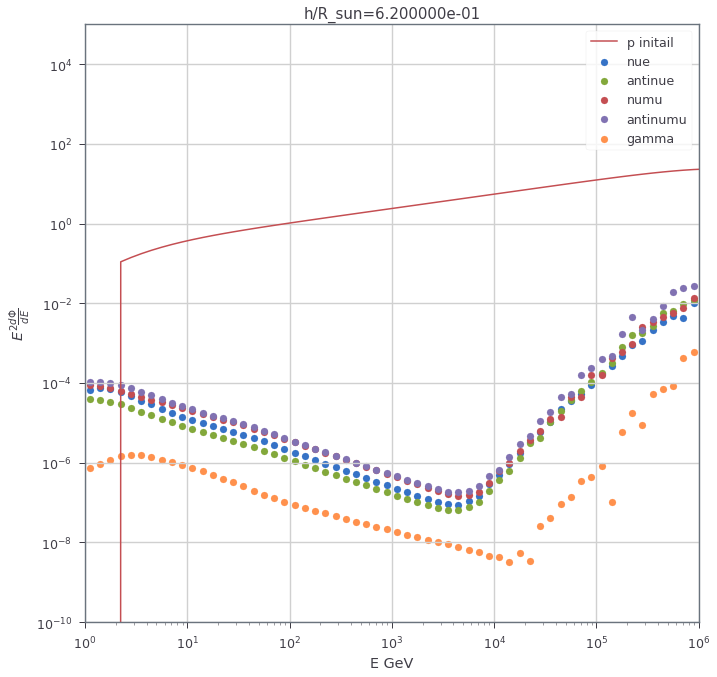

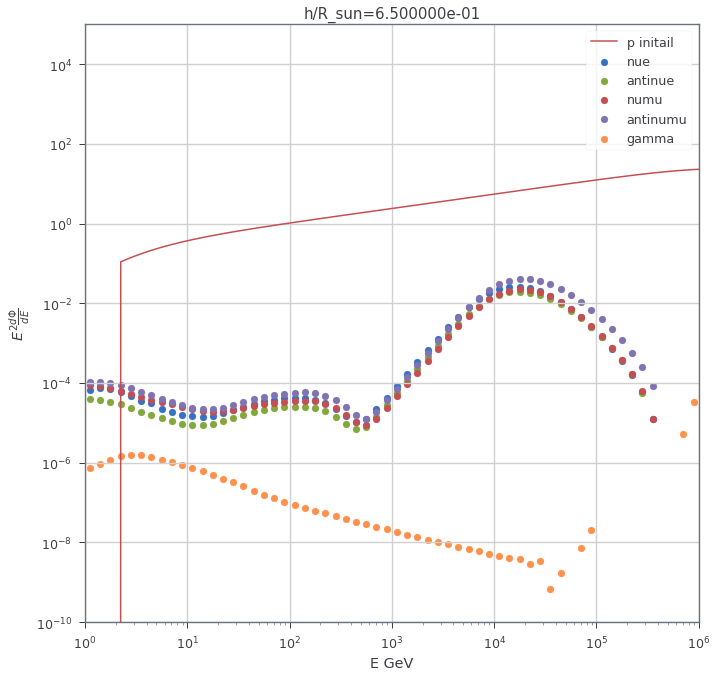

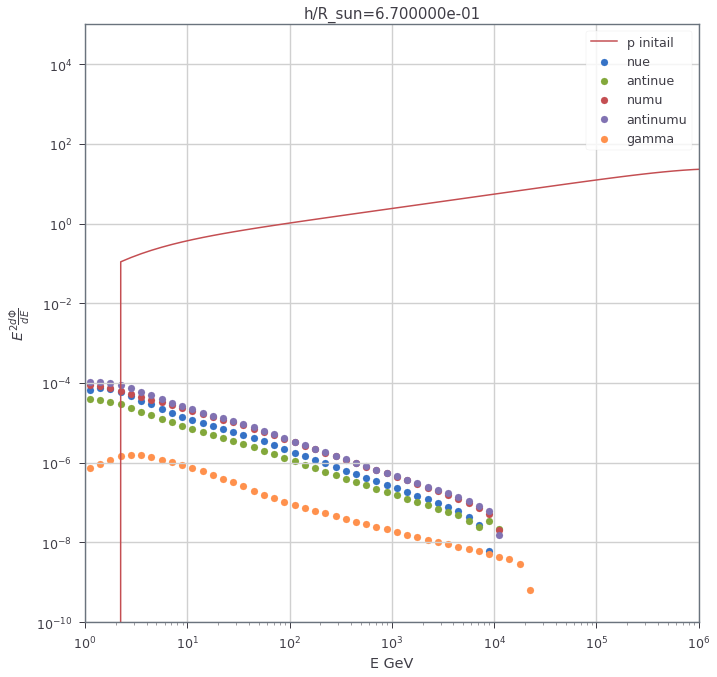

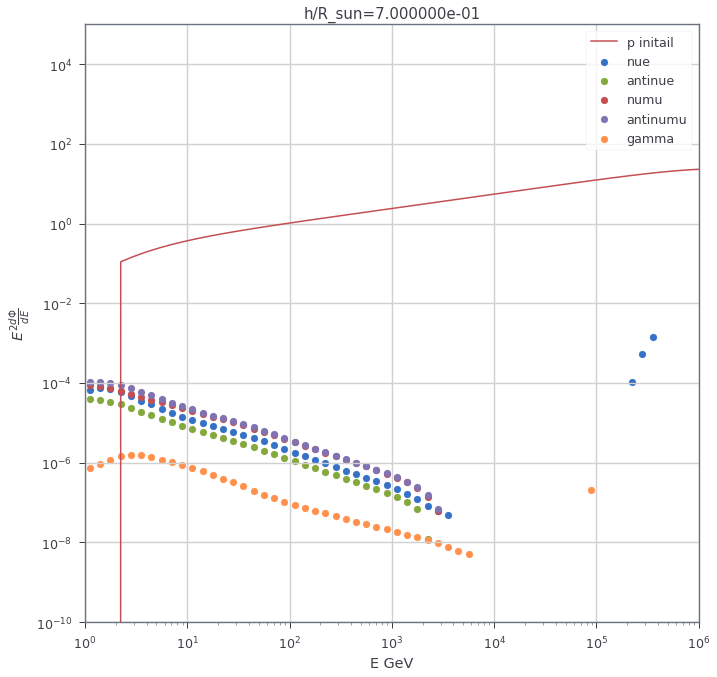

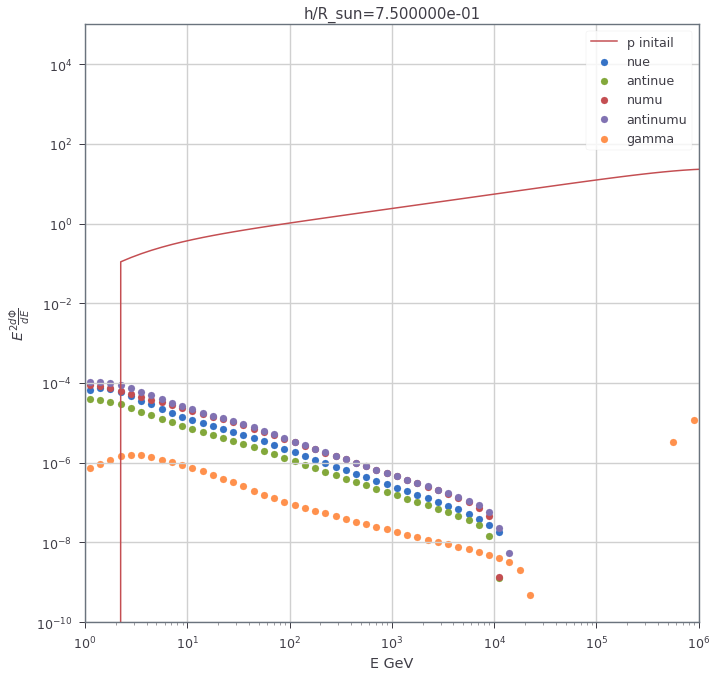

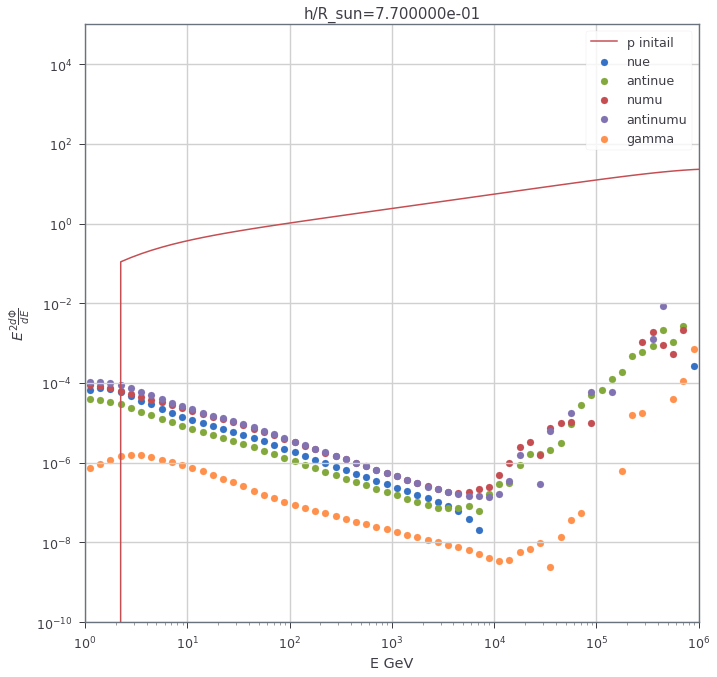

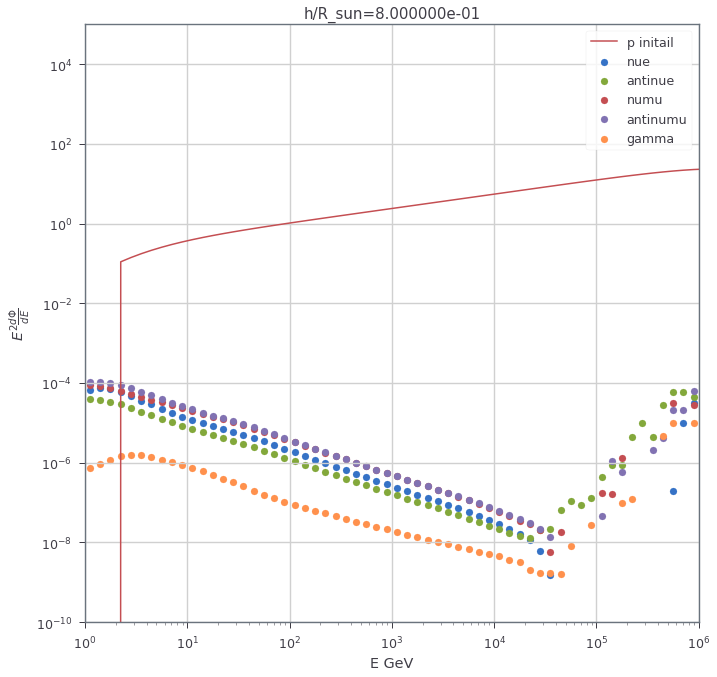

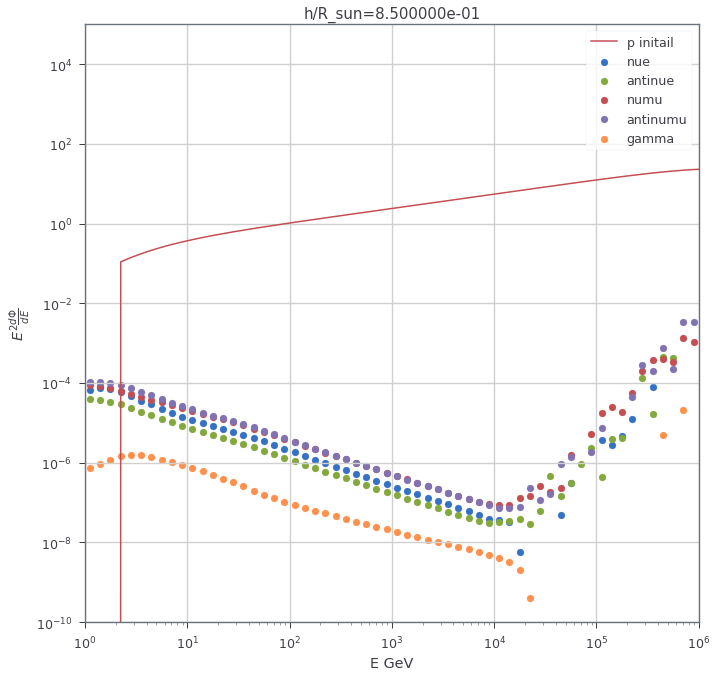

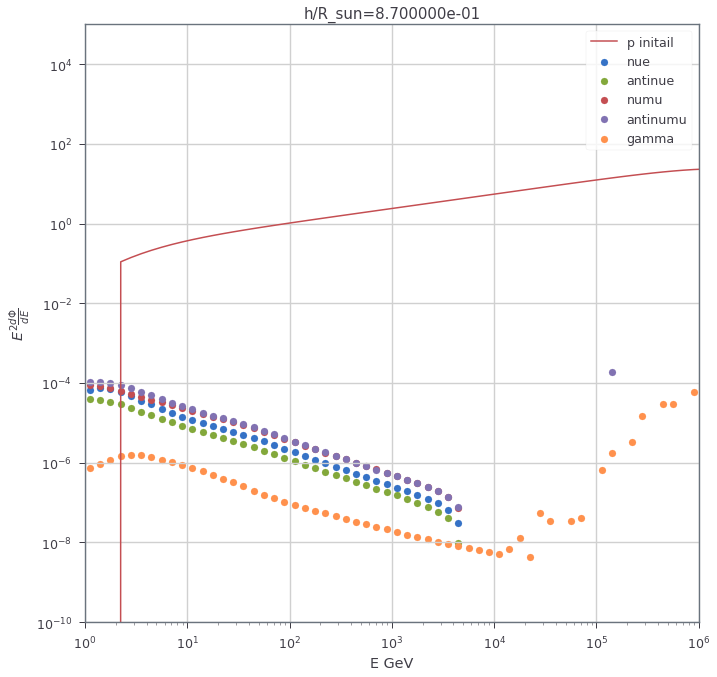

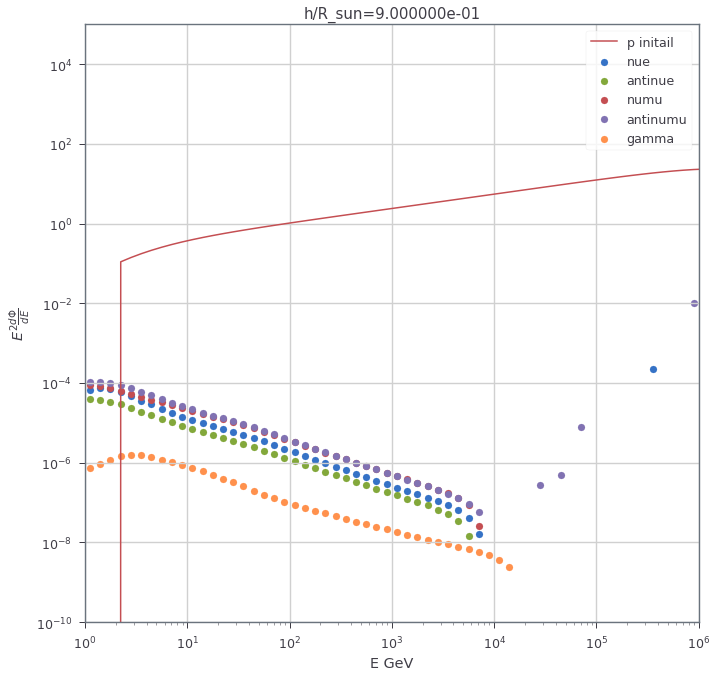

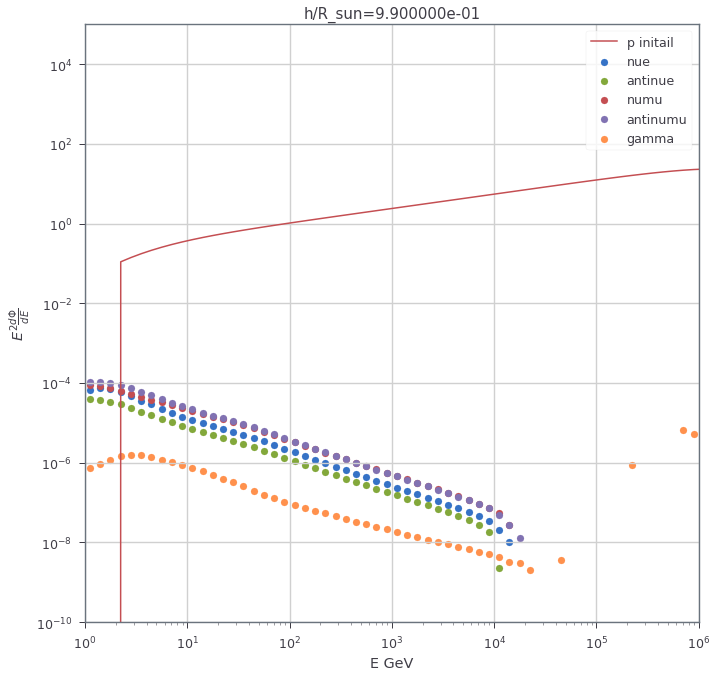

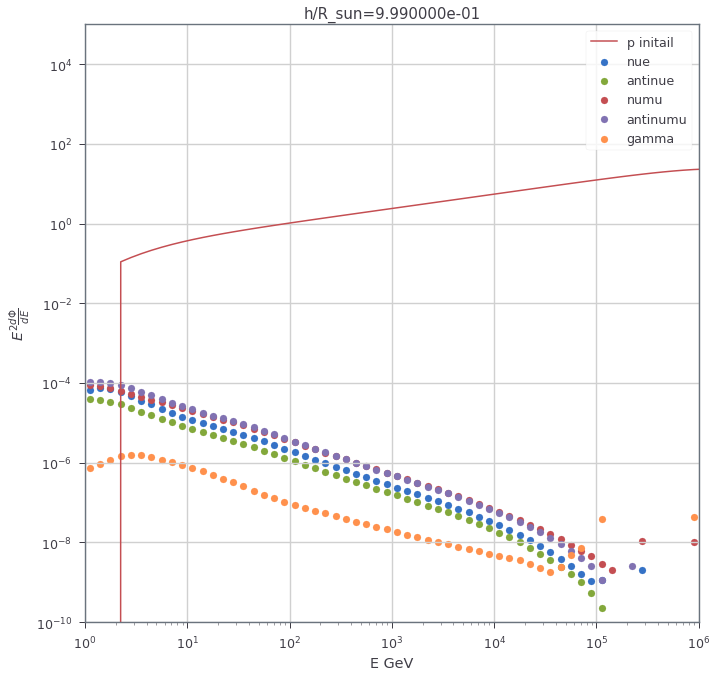

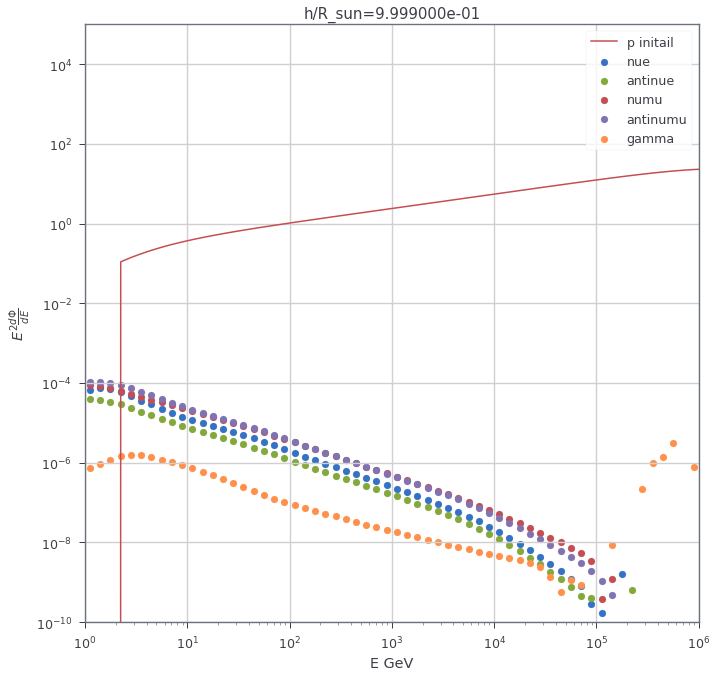

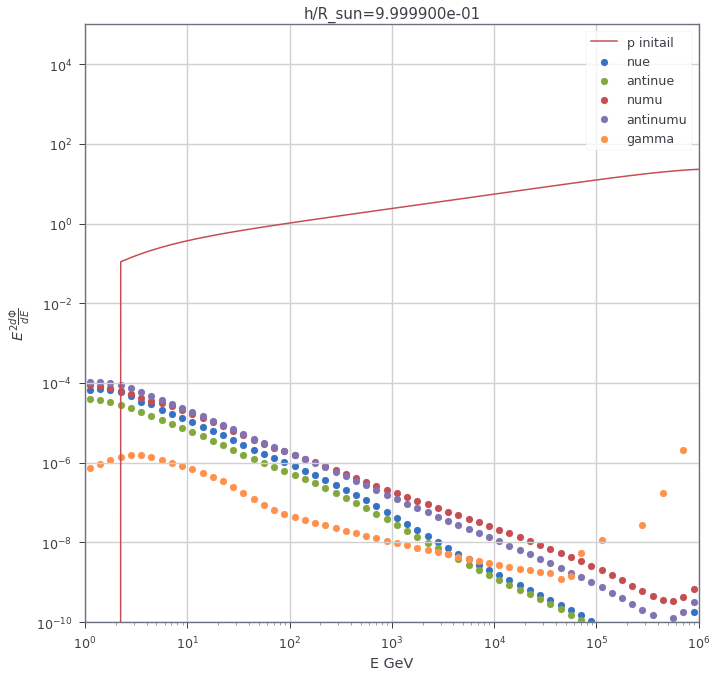

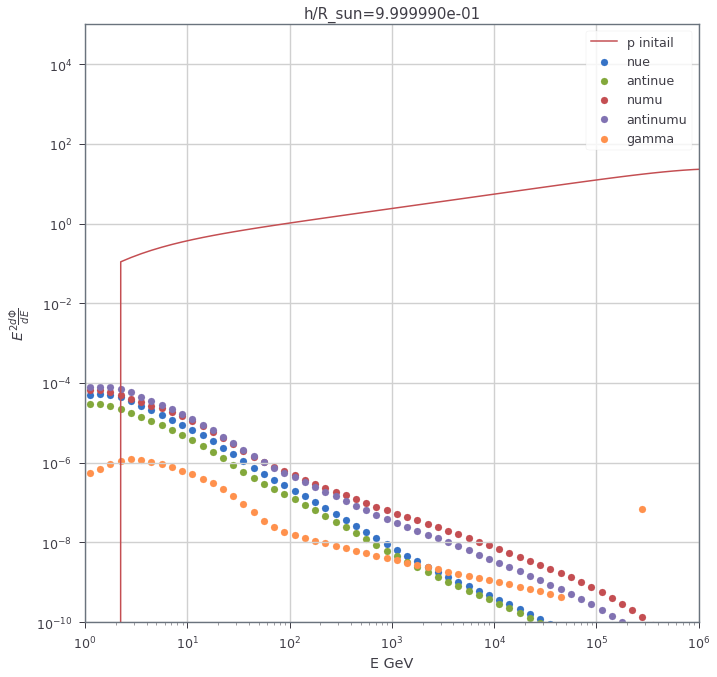

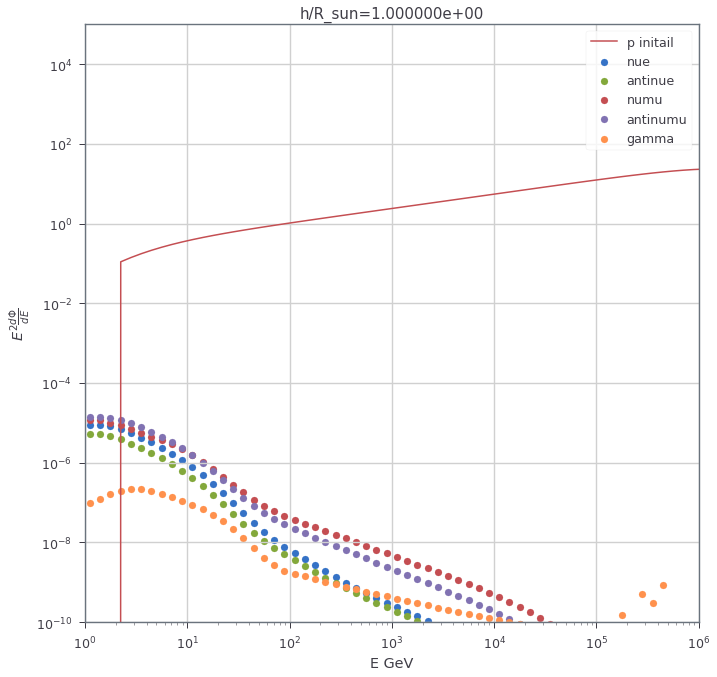

In [18]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
up=25
down=65
def f(x,a,b):
    return a*x**(-b)

for i,h in enumerate(h_list):
    plt.figure(figsize=(11,11))
    plt.title('h/R_sun='+'{:e}'.format(h),fontsize=15)

    for p in list_particles[17:]:
        bb_1=np.transpose(dphidE[h_list[i]*R_sun]['y'])

                #bb_2=np.transpose(sol_ivp_csr[h_list[i+1]*R_sun]['y'])
                #phi_ratio=bb_1[-1][ind[p.name,'up']:ind[p.name,'low']]/ bb_2[-1][ind[p.name,'up']:ind[p.name,'low']]
        rr=(bb_1[-1][ind[p.name,'up']:ind[p.name,'low']])

        #popt,pcov=curve_fit(f,mceq_run.e_grid[up:down],rr[up:down])
        #print(popt)#rr=rr*(mceq_run.e_grid**3)
        plt.scatter(mceq_run.e_grid,rr*mceq_run.e_grid**2 *mceq_run.e_widths,label=p.name)
    plt.plot(mceq_run.e_grid,phi0_p*mceq_run.e_grid**2  *mceq_run.e_widths,"r",label='p initail')
    plt.grid()
    plt.xlim((1,1e6))
    plt.ylim((1e-10,1e5))
    plt.xlabel('E GeV')
    plt.ylabel(r'$E^2\frac{d\Phi}{dE}$')
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()

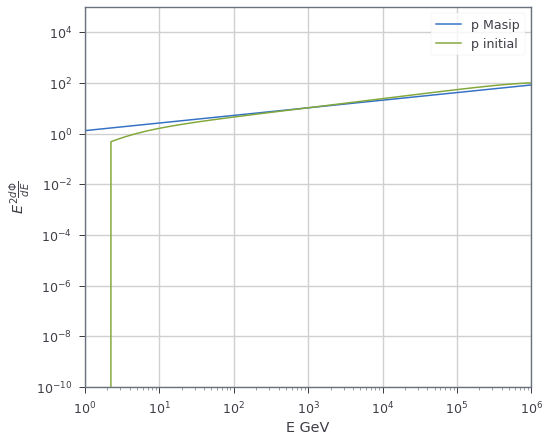

In [19]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
up=25
down=65
def f(x,a,b):
    return a*x**(-b)


plt.plot(mceq_run.e_grid,f(mceq_run.e_grid,1.3,2.7)*mceq_run.e_grid**3  ,label='p Masip')        
plt.plot(mceq_run.e_grid,(phi0_p)*mceq_run.e_grid**3 ,label='p initial')
plt.grid()
plt.xlim((1,1e6))
plt.ylim((1e-10,1e5))
plt.xlabel('E GeV')
plt.ylabel(r'$E^2\frac{d\Phi}{dE}$')
plt.xscale("log")
plt.yscale("log")
plt.legend()


In [17]:
mceq_run.pman[12]


        nue:
        is_hadron     : False
        is_lepton     : True
        is_nucleus    : False
        is_stable     : True
        is_mixed      : False
        is_resonance  : False
        is_tracking   : False
        is_projectile : False
        mceqidx       : 3
        E_mix         : 0.0e+00 GeV

In [18]:
dphidE_i_ms[I_models[0]].keys()

dict_keys([6957000000.0, 48699000000.0])

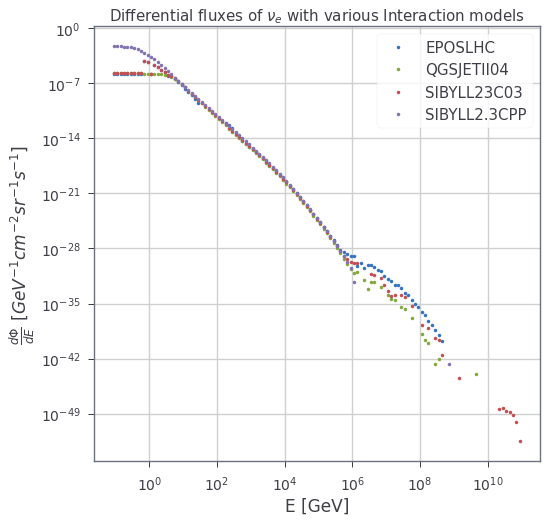

In [31]:
h=0.8*R_sun
plt.figure(figsize=(8,8))
plt.title(r'Differential fluxes of $\nu_{e}$ with various Interaction models',fontsize=15)
for i,im in enumerate(I_models) :
   
    for p in [mceq_run.pman[12]]:
        bb_1=(d[im][h])
        #print(bb_1.shape)
        #bb_2=np.transpose(sol_ivp_csr[h_list[i+1]*R_sun]['y'])
        #phi_ratio=bb_1[-1][ind[p.name,'up']:ind[p.name,'low']]/ bb_2[-1][ind[p.name,'up']:ind[p.name,'low']]
        rr=(bb_1[-1][ind[p.name,'up']:ind[p.name,'low']])
        
        #rr=rr*(mceq_run.e_grid**3)
        plt.plot(mceq_run.e_grid,rr,'.',label=im)
    #print(np.sum(rr*mceq_run.e_widths,axis=0))
    #phi_t.append(abs(np.sum(rr*mceq_run.e_widths,axis=0)))   

#plt.scatter(h_list[::-1],
                 #phi_t[::-1],label=p.name)
        
    #plt.plot(mceq_run.e_grid,phi[ind["p+","up"]:ind["p+","low"]],"c-.",label="p+ initial ")

    #plt.title(r" max X =  "+ '{:e}'.format(X[new_h[i]][-1]))

bb_1=(dphidE[h])

                #bb_2=np.transpose(sol_ivp_csr[h_list[i+1]*R_sun]['y'])
                #phi_ratio=bb_1[-1][ind[p.name,'up']:ind[p.name,'low']]/ bb_2[-1][ind[p.name,'up']:ind[p.name,'low']]
rr=(bb_1[-1][ind[p.name,'up']:ind[p.name,'low']])  
plt.plot(mceq_run.e_grid,rr,'.',label='SIBYLL2.3CPP')
plt.xlabel("E [GeV]",fontsize=17)
plt.ylabel(r'$\frac{d\Phi}{dE}$ $[GeV^{-1}cm^{-2}sr^{-1}s^{-1}]$',fontsize=17)
    #plt.ylim((1e-10,1e-3))
    #plt.xlim((1e1,1e6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
    #plt.savefig('/home/kruteesh/Desktop/Solar_neutrinos/diffsec/pics/14,01,21/'+str(h_list[i])+'.png')


# In[48]:         

In [32]:
dphidE.keys()

dict_keys([0.0, 695700000.0, 6957000000.0, 13914000000.0, 27828000000.0, 34785000000.0, 55656000000.0, 62613000000.0, 63308700000.0, 64004400000.0, 64700100000.0, 65395800000.0, 66091500000.0, 66787200000.0, 67482900000.0, 68178600000.0, 68874300000.0, 69222150000.0, 69500430000.0, 69535215000.0, 69563043000.0, 69569304300.0, 69569652150.0, 69569999304.3])

In [33]:
np.array([0.0, 695700000.0, 6957000000.0, 13914000000.0, 27828000000.0, 34785000000.0, 55656000000.0, 62613000000.0, 63308700000.0, 64004400000.0, 64700100000.0, 65395800000.0, 66091500000.0, 66787200000.0, 67482900000.0, 68178600000.0, 68874300000.0, 69222150000.0, 69500430000.0, 69535215000.0, 69563043000.0, 69569304300.0, 69569652150.0, 69569999304.3])/R_sun

array([0.        , 0.01      , 0.1       , 0.2       , 0.4       ,
       0.5       , 0.8       , 0.9       , 0.91      , 0.92      ,
       0.93      , 0.94      , 0.95      , 0.96      , 0.97      ,
       0.98      , 0.99      , 0.995     , 0.999     , 0.9995    ,
       0.9999    , 0.99999   , 0.999995  , 0.99999999])

In [27]:
h_ivp=np.array([0.01      , 0.1       , 0.4       , 0.8       , 0.99      ,
       0.999     , 0.9999    , 0.99999   , 0.99999999])*R_sun

0.0026949573936681567 0.01
0.0027385384288935834 0.1
0.002759039658755619 0.4
0.0027597781628781134 0.8
0.0027597638667703635 0.99
0.0027597404563305754 0.999
0.002759647861025642 0.9999
0.0027164561959937324 0.99999
0.00031166564992852466 0.9999999900000001


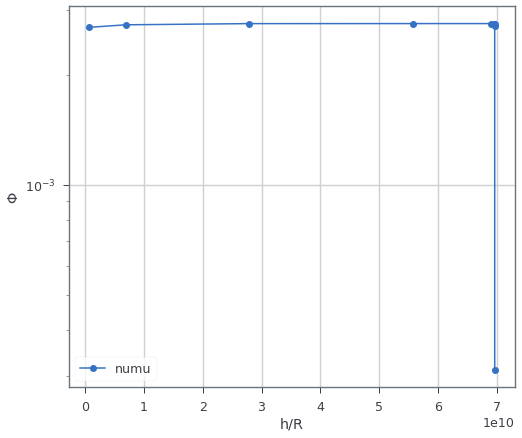

In [31]:
import matplotlib.pyplot as plt
import numpy as np
phi_t=[]
p=mceq_run.pman[14]
for h in h_ivp:
    bb_1=(dphidE[h])
    rr=(bb_1['y'].T[-1][ind[p.name,'up']:ind[p.name,'low']])
    print(np.sum(rr*mceq_run.e_widths),h/R_sun)
    phi_t.append((np.sum(rr*mceq_run.e_widths)))

fig, ax = plt.subplots()
hh=h_list[::-1]
ax.plot(h_ivp,phi_t,'o-',label=p.name)
#ax.set_xlim(0.95, 1.02)  # decreasing time
ax.set_yscale("log")
ax.set_xlabel("h/R")
ax.set_ylabel(r"$\Phi$")
ax.grid(True)
ax.legend()
plt.show()

In [33]:

0.999999990000000-0.9999999900000000

0.0